In [1]:
# Importación de librerías
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de las rutas (ajustar según tus directorios)
base_path = r"C:\Users\Yago\Documents\Basketmática\Social_Agosto2024\Datos CSV"
save_path = r"C:\Users\Yago\Documents\Basketmática\Social_Agosto2024"

# Función para cargar datasets
def load_data(file_name):
    return pd.read_csv(os.path.join(base_path, file_name))

# Cargar los datasets
df_players_complete_stats = load_data('nba_2017_players_with_salary_wiki_twitter.csv')
df_players_wikipedia = load_data('nba_2017_player_wikipedia.csv')

In [2]:
# Eliminamos columna innecesaria
df_players_complete_stats.drop(columns = 'Unnamed: 0', inplace=True)

# Vistazo al conjunto de datos
df_players_complete_stats.sort_values(by=['MP'], ascending=False)

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
5,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,...,1.93,8.42,20.43,18.3,98.38,51,30.96,14704.0,5533.5,1501.5
29,37,Zach LaVine,SG,21,37.2,6.9,15.1,0.459,2.6,6.6,...,-2.35,-2.97,0.17,9.5,96.38,16,2.24,1103.0,178.5,67.0
13,16,Andrew Wiggins,SF,21,37.2,8.6,19.1,0.452,1.3,3.5,...,-3.16,-1.60,2.94,9.5,97.56,31,6.01,1778.5,182.0,54.5
10,13,Karl-Anthony Towns,C,21,37.0,9.8,18.0,0.542,1.2,3.4,...,-1.41,2.13,10.00,17.1,97.10,31,5.96,2046.5,0.0,105.0
11,14,Jimmy Butler,SF,27,37.0,7.5,16.5,0.455,1.2,3.3,...,1.80,6.62,17.35,16.4,97.78,40,17.55,41.0,89.5,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,459,Ryan Kelly,PF,25,6.9,0.5,1.8,0.286,0.3,0.6,...,1.45,-0.49,0.08,7.3,96.26,6,1.58,23.0,17.0,10.0
238,475,Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0.0,0.2,...,0.43,-1.68,0.08,0.8,104.33,4,0.06,109.0,NaN,NaN
234,455,Nick Collison,PF,36,6.4,0.7,1.2,0.609,0.0,0.1,...,1.12,-1.06,0.17,12.0,97.52,10,3.75,283.5,10.0,12.0
237,460,Jordan Mickey,PF,22,5.6,0.6,1.4,0.441,0.0,0.0,...,-0.15,-2.77,0.03,6.0,97.66,9,1.47,129.5,0.0,3.0


# Preprocesado de datos

In [3]:
# Verificamos la información del dataframe
df_players_complete_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rk                      239 non-null    int64  
 1   PLAYER                  239 non-null    object 
 2   POSITION                239 non-null    object 
 3   AGE                     239 non-null    int64  
 4   MP                      239 non-null    float64
 5   FG                      239 non-null    float64
 6   FGA                     239 non-null    float64
 7   FG%                     239 non-null    float64
 8   3P                      239 non-null    float64
 9   3PA                     239 non-null    float64
 10  3P%                     232 non-null    float64
 11  2P                      239 non-null    float64
 12  2PA                     239 non-null    float64
 13  2P%                     239 non-null    float64
 14  eFG%                    239 non-null    fl

Podemos observar que hay valores nulos en estadísticas de Twitter (TWITTER_FAVORITE_COUNT y TWITTER_RETWEET_COUNT), %TL y %T3. Podemos interpretarlo como jugadores que no tienen Twitter y, en el caso de los porcenajes de tiro, jugadores que no intentaron tiros libres o triples respectivamente.

In [3]:
# Eliminamos filas con valores nulos en 'TWITTER_FAVORITE_COUNT'
df_players_complete_stats.dropna(subset=['TWITTER_FAVORITE_COUNT'], inplace=True)

# Sustituimos valores nulos en '3P%' y 'FT%' por 0 (jugadores que no intentaron ninguno de esos tiros)
df_players_complete_stats[['3P%', 'FT%']] = df_players_complete_stats[['3P%', 'FT%']].fillna(0)
df_players_complete_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 237
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rk                      236 non-null    int64  
 1   PLAYER                  236 non-null    object 
 2   POSITION                236 non-null    object 
 3   AGE                     236 non-null    int64  
 4   MP                      236 non-null    float64
 5   FG                      236 non-null    float64
 6   FGA                     236 non-null    float64
 7   FG%                     236 non-null    float64
 8   3P                      236 non-null    float64
 9   3PA                     236 non-null    float64
 10  3P%                     236 non-null    float64
 11  2P                      236 non-null    float64
 12  2PA                     236 non-null    float64
 13  2P%                     236 non-null    float64
 14  eFG%                    236 non-null    fl

# 1. Análisis descriptivo del impacto social

Estadísticas descriptivas:
          PAGEVIEWS  TWITTER_FAVORITE_COUNT  TWITTER_RETWEET_COUNT
count    236.000000              236.000000             236.000000
mean     761.595339              237.466102              91.817797
std     1709.488562             1025.210355             335.474533
min        2.000000                0.000000               0.000000
25%      149.625000                4.000000               8.000000
50%      325.750000               22.500000              15.000000
75%      649.500000               81.625000              47.875000
max    17570.500000            12278.000000            2941.000000

Top 10 jugadores por likes en Twitter:
               PLAYER  TWITTER_FAVORITE_COUNT
7       Stephen Curry                 12278.0
25        Joel Embiid                  6852.5
5        LeBron James                  5533.5
6       Kawhi Leonard                  2701.5
0   Russell Westbrook                  2130.5
35       Derrick Rose                  1864.0
57      

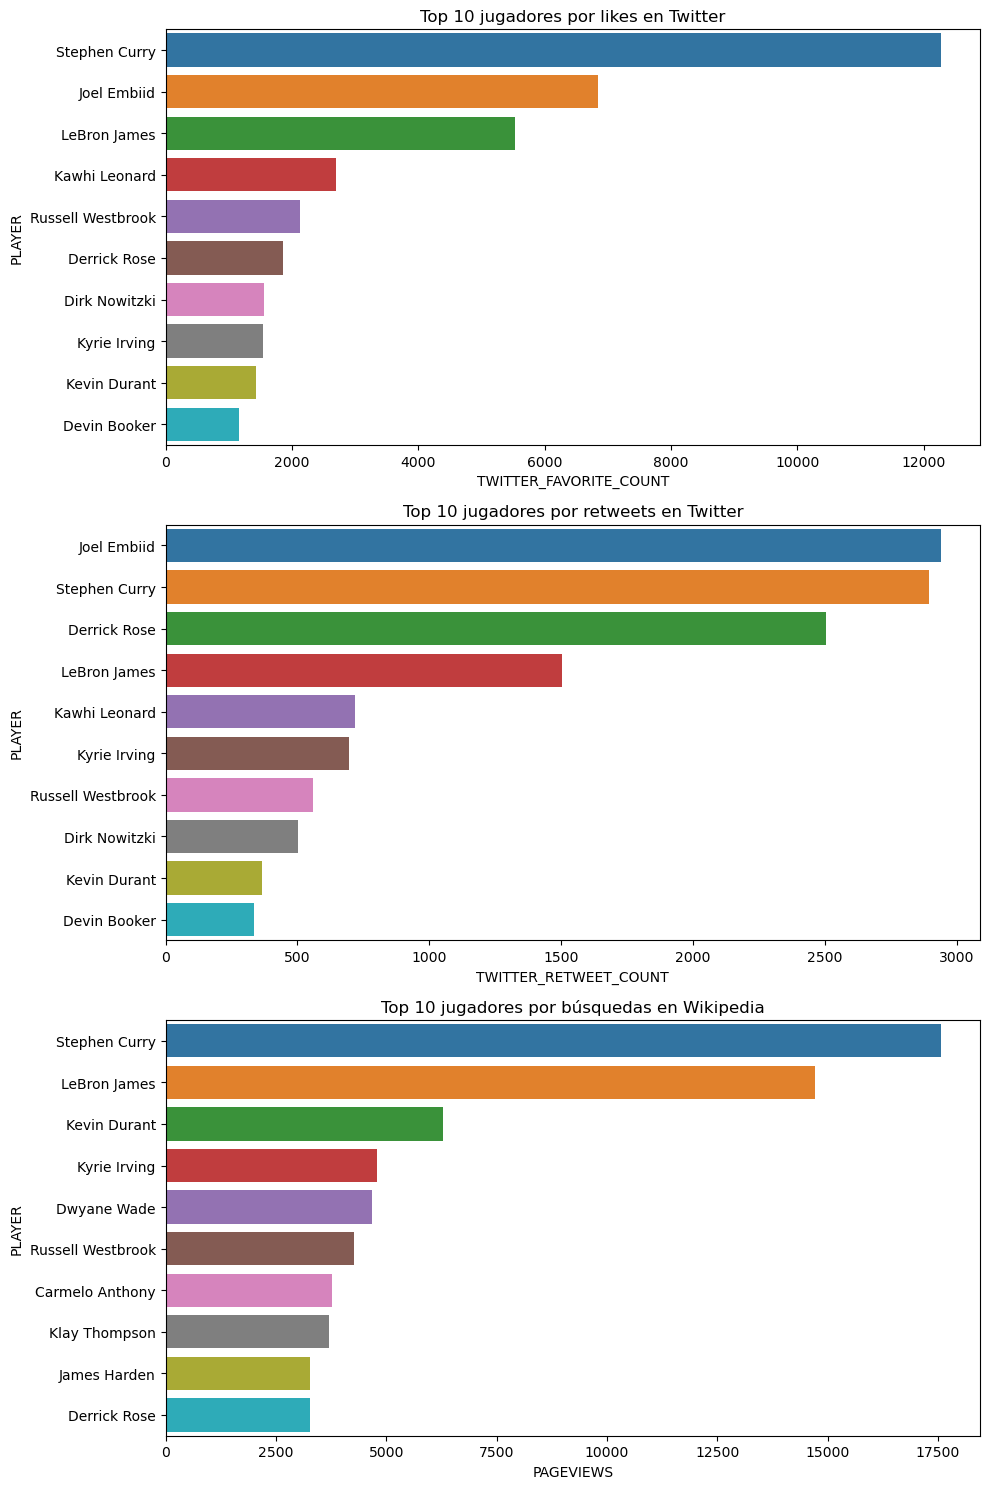

In [4]:
def analyze_social_impact(df):
    # Estadísticas descriptivas (media, desviación estándar, cuartiles)
    print("Estadísticas descriptivas:")
    print(df[['PAGEVIEWS', 'TWITTER_FAVORITE_COUNT', 'TWITTER_RETWEET_COUNT']].describe())
    
    # Sacamos el top 10 de jugadores con más favoritos en Twitter, retweets en Twitter y visitas en Wikipedia
    top_likes = df.sort_values(by='TWITTER_FAVORITE_COUNT', ascending=False).head(10)
    top_retweets = df.sort_values(by='TWITTER_RETWEET_COUNT', ascending=False).head(10)
    top_pageviews = df.sort_values(by='PAGEVIEWS', ascending=False).head(10)
    
    # Imprimimos los resultados
    print("\nTop 10 jugadores por likes en Twitter:")
    print(top_likes[['PLAYER', 'TWITTER_FAVORITE_COUNT']])
    
    print("\nTop 10 jugadores por retweets en Twitter:")
    print(top_retweets[['PLAYER', 'TWITTER_RETWEET_COUNT']])
    
    print("\nTop 10 jugadores por búsquedas en Wikipedia:")
    print(top_pageviews[['PLAYER', 'PAGEVIEWS']])
    
    # Visualización de resultados
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    
    sns.barplot(x='TWITTER_FAVORITE_COUNT', y='PLAYER', data=top_likes, ax=axs[0])
    axs[0].set_title('Top 10 jugadores por likes en Twitter')
    
    sns.barplot(x='TWITTER_RETWEET_COUNT', y='PLAYER', data=top_retweets, ax=axs[1])
    axs[1].set_title('Top 10 jugadores por retweets en Twitter')
    
    sns.barplot(x='PAGEVIEWS', y='PLAYER', data=top_pageviews, ax=axs[2])
    axs[2].set_title('Top 10 jugadores por búsquedas en Wikipedia')
    
    plt.tight_layout()
    plt.show()

analyze_social_impact(df_players_complete_stats)

# 2. Relación entre impacto social y rendimiento deportivo

Para ver la correlación entre el impacto social y el rendimiento deportivo, se pueden escoger algunas métricas para hacer la regresión. Las métricas disponibles que mejor pueden reflejar el rendimiento es el PIE (Player Impact Estimate) y RPM (Real Plus-Minus).

In [5]:
# Análisis descriptivo de las métricas PIE y RPM
print("Análisis descriptivo de PIE y RPM:")
print(df_players_complete_stats[['PIE', 'RPM']].describe())

Análisis descriptivo de PIE y RPM:
              PIE         RPM
count  236.000000  236.000000
mean     9.632203   -0.279915
std      3.540438    2.659339
min     -0.400000   -6.600000
25%      7.300000   -2.127500
50%      9.000000   -0.725000
75%     11.700000    1.242500
max     23.000000    8.420000


Ambas métricas se compararán individualmente con las métricas de impacto social (favoritos y retweets en Twitter y visitas en Wikipedia) utilizando un modelo de regresión linear, con el fin de encontrar alguna posible correlación entre las dos métricas de rendimiento y las métricas sociales ya mencionadas.

In [10]:
# Función para entrenar el modelo de regresión lineal y evaluar su rendimiento
def linear_regression_analysis(df, X_features, y_feature):
    scaler = StandardScaler()
    # Variables independientes (métricas de rendimiento)
    X = df[X_features]
    X_scaled = scaler.fit_transform(X)
    # Variable dependiente (métrica social)
    y = df[y_feature]
    
    # Dividimos los datos en conjunto de entrenamiento del modelo y conjunto de test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Entrenamiento del modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluación del modelo (MSE y R2)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nResultados para {y_feature}:')
    print(f'MSE: {mse}')
    print(f'R^2: {r2}')

    return model, X_test, y_test, y_pred

# Función para visualizar los resultados de la regresión
def plot_relationship(df, x_features, y_feature):
    fig, axs = plt.subplots(1, len(x_features), figsize=(20, 6))

    for i, feature in enumerate(x_features):
        sns.scatterplot(x=feature, y=y_feature, data=df, ax=axs[i])
        axs[i].set_title(f'Relación entre {feature} y {y_feature}')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel(y_feature)
        sns.regplot(x=feature, y=y_feature, data=df, scatter=False, ax=axs[i], color='green')

    plt.tight_layout()
    plt.show()

# Métricas para análisis
X_features = ['PIE', 'RPM']


Resultados para PAGEVIEWS:
MSE: 1143629.4238544202
R^2: 0.20381267520910074


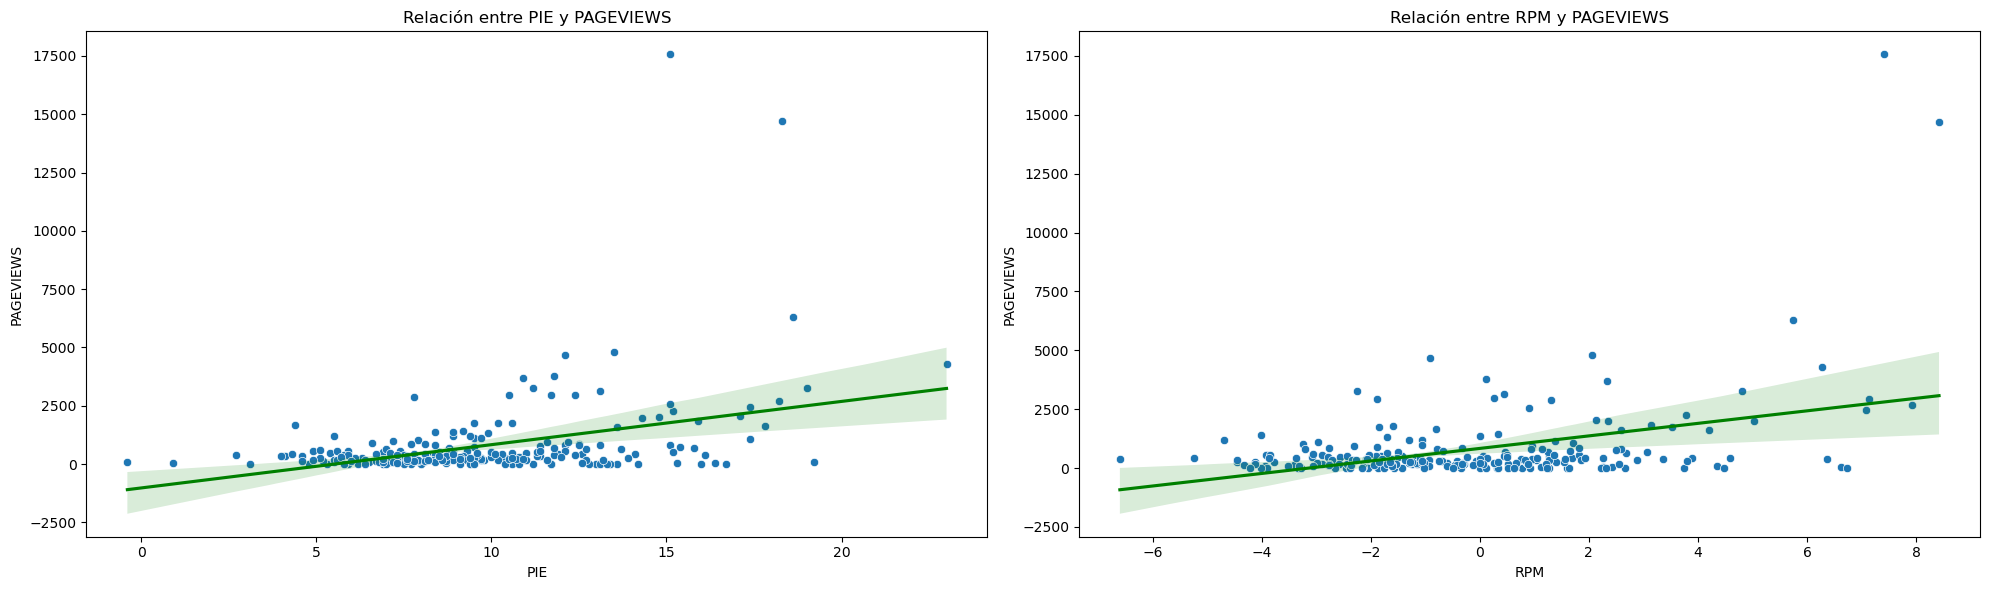

In [11]:
# Análisis 1: Cantidad de visitas en Wikipedia
model_wikipedia, X_test_wikipedia, y_test_wikipedia, y_pred_wikipedia = linear_regression_analysis(df_players_complete_stats, X_features, 'PAGEVIEWS')
plot_relationship(df_players_complete_stats, X_features, 'PAGEVIEWS')


Resultados para TWITTER_FAVORITE_COUNT:
MSE: 924513.7052752041
R^2: 0.07874295188485914


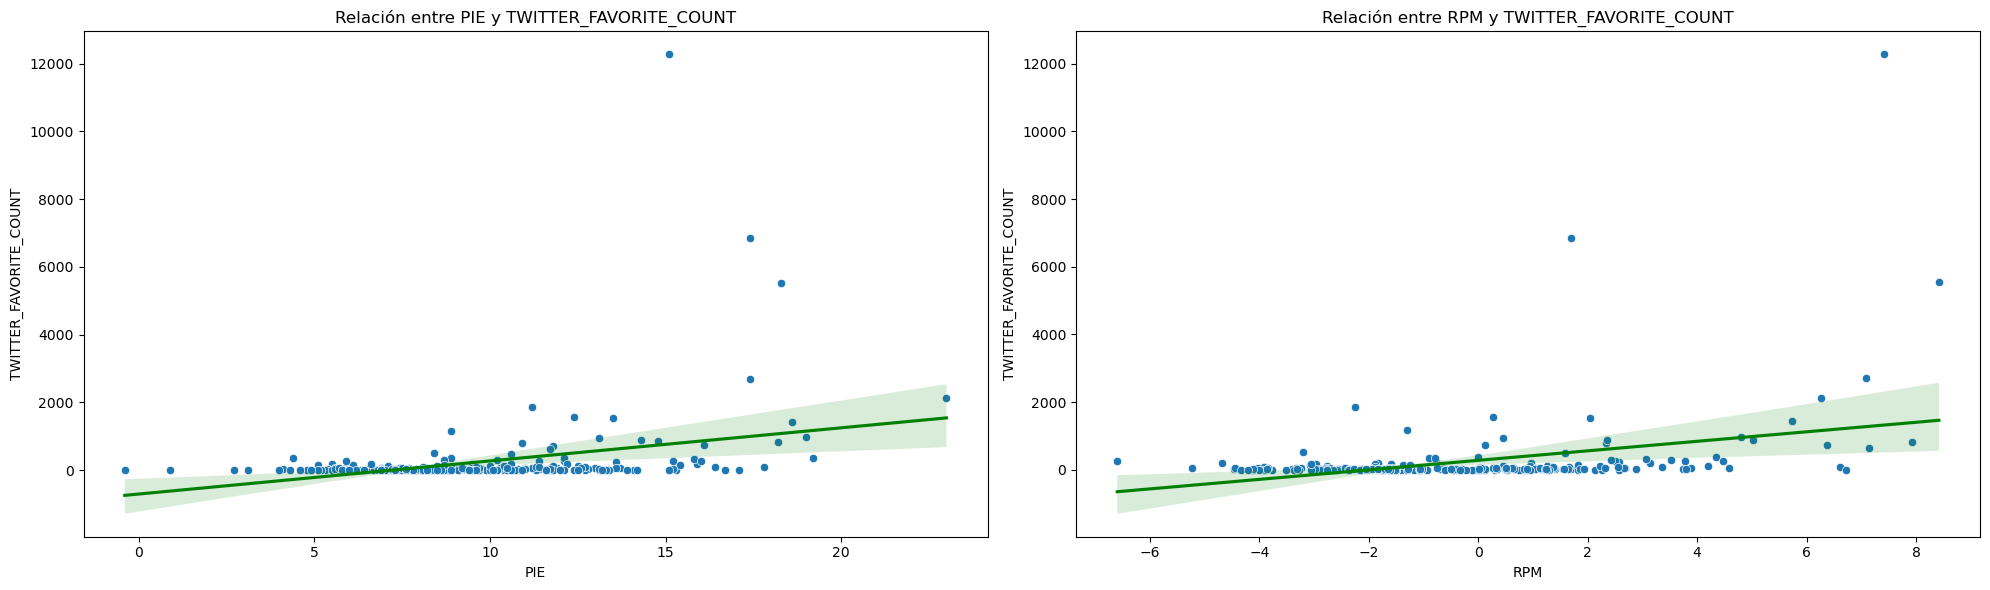

In [12]:
# Análisis 2: Cantidad de favoritos en Twitter
model_favorites, X_test_favorites, y_test_favorites, y_pred_favorites = linear_regression_analysis(df_players_complete_stats, X_features, 'TWITTER_FAVORITE_COUNT')
plot_relationship(df_players_complete_stats, X_features, 'TWITTER_FAVORITE_COUNT')


Resultados para TWITTER_RETWEET_COUNT:
MSE: 159370.6370343918
R^2: 0.09901130333411812


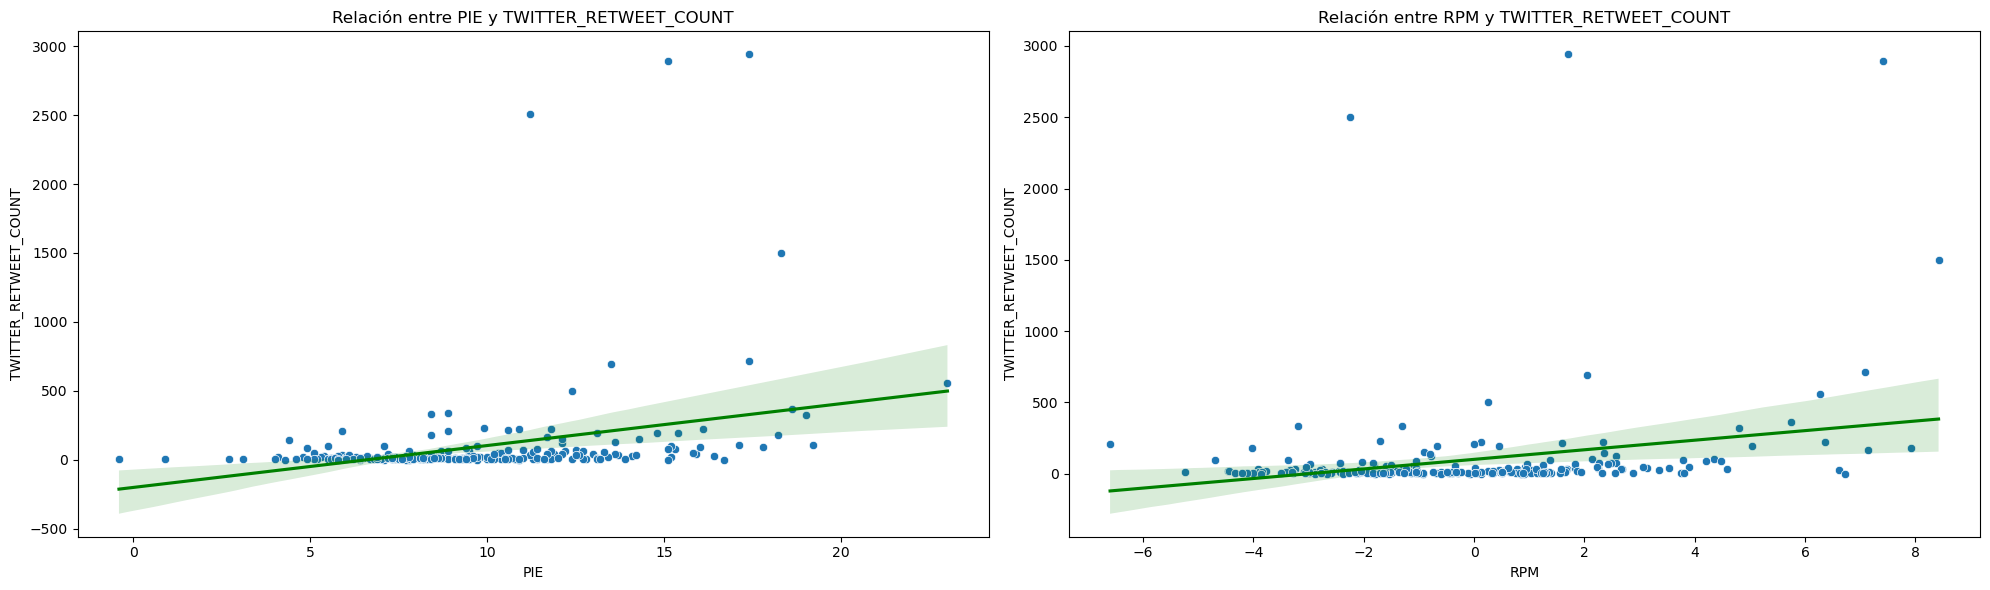

In [13]:
# Análisis 3: Cantidad de retweets en Twitter
model_retweets, X_test_retweets, y_test_retweets, y_pred_retweets = linear_regression_analysis(df_players_complete_stats, X_features, 'TWITTER_RETWEET_COUNT')
plot_relationship(df_players_complete_stats, X_features, 'TWITTER_RETWEET_COUNT')

# 3. Factores que generan impacto social

Tras no obtener apenas correlación utilzando el PIE y RPM, toca ampliar el foco. ¿Cuáles de todas las métricas de rendimiento tienen mayor correlación con las métricas de impacto social? Para ello, utilizamos el lenguaje de programación R con el fin de facilitar el análisis de coeficientes para los modelos de regresión. Pueden encontrar esta sección dentro del repositorio en el archivo 'ProyectoSocial.R'

In [28]:
# Guardar el dataset limpio para análisis en R
df_players_complete_stats.to_csv(os.path.join(save_path, 'players_complete_stats_clean.csv'), index=False)

# 4. Estudio de caso: top-5 búsquedas en Wikipedia

Teniendo ya nuestro top 5 de jugadores que más impacto social generan según Wikipedia y Twitter, resulta interesante ver los picos de búsquedas en Wikipedia de este nicho de jugadores y buscar las causas de semejantes picos. Para ello, utilizamos el Dataframe df_players_wikipedia

In [29]:
# Eliminamos columna innecesaria
df_players_wikipedia.drop(columns = 'Unnamed: 0', inplace=True)

# Filtramos por número de visitas en Wikipedia y nos quedamos con el top 5
top5_wikipedia = df_players_wikipedia.sort_values(by=['pageviews'], ascending=False).head(5)
print("\nTop 5 jugadores con más búsquedas en un día en Wikipedia:")
print(top5_wikipedia[['names', 'pageviews', 'timestamps']])


Top 5 jugadores con más búsquedas en un día en Wikipedia:
               names  pageviews  timestamps
2001    LeBron James    1129366  2016062000
2733   Stephen Curry     345025  2016062000
3099    Kyrie Irving     311503  2016062000
3479    Kevin Durant     277863  2016070400
11534    Dwyane Wade     259337  2016070700


Si analizamos, el top 3 de picos de Wikipedia para cada jugador fue el mismo día 20/06/2016. Y sí, ese día fue cuando se
disputó el séptimo partido de las finales de la NBA entre Cleveland Cavaliers y GSW.

Analizando los otros dos casos del general: KD ese día fue cuando se anunció que ponía rumbo a GSW. Dwyane Wade ese día puso rumbo a Chicago, dejando Miami Heat

In [31]:
# Guardar el dataset limpio para visualizaciones en Tableau
df_players_complete_stats.to_excel(os.path.join(save_path, 'players_complete_stats_clean.xlsx'), index=False)
df_players_wikipedia.to_excel(os.path.join(save_path, 'players_wikipedia_clean.xlsx'), index=False)